# 1. Cargar la data

In [1]:
import pandas as pd
Credit = pd.read_excel('creditos_bancarios.xlsx', sheet_name='SouthGermanCredit') 
CreditDesc = Credit.describe()

Revisar Balance y cantidad

# 2. Limpiar la data

La varible "purpose" no sigue la lógica de riesgo, se tratará cada concepto como una variable binaria.

In [2]:
Credit_0 = pd.get_dummies(Credit,columns=['purpose'])
Credit_0Desc = Credit_0.describe()



Separación de Variable Dependiente e Independientes

In [3]:
Y=Credit_0["credit_risk"]
Xs=Credit_0.drop('credit_risk',axis=1)
Xs


status  duration  credit_history  amount  savings  employment_duration  \
0         1        18               4    1049        1                    2   
1         1         9               4    2799        1                    3   
2         2        12               2     841        2                    4   
3         1        12               4    2122        1                    3   
4         1        12               4    2171        1                    3   
..      ...       ...             ...     ...      ...                  ...   
995       1        24               2    1987        1                    3   
996       1        24               2    2303        1                    5   
997       4        21               4   12680        5                    5   
998       2        12               2    6468        5                    1   
999       1        30               2    6350        5                    5   

     installment_rate  personal_status_sex  other_debtors  present_residence  \
0                   4                    2              1                  4   
1                   2                    3              1                  2   
2                   2                    2              1                  4   
3                   3                    3              1                  2   
4                   4                    3              1                  4   
..                ...                  ...            ...                ...   
995                 2                    3              1                  4   
996                 4                    3              2                  1   
997                 4                    3              1                  4   
998                 2                    3              1                  1   
999                 4                    3              1                  4   

     ...  purpose_0  purpose_1  purpose_2  purpose_3  purpose_4  purpose_5  \
0    ...          0          0          1          0          0          0   
1    ...          1          0          0          0          0          0   
2    ...          0          0          0          0          0          0   
3    ...          1          0          0          0          0          0   
4    ...          1          0          0          0          0          0   
..   ...        ...        ...        ...        ...        ...        ...   
995  ...          0          0          0          1          0          0   
996  ...          1          0          0          0          0          0   
997  ...          1          0          0          0          0          0   
998  ...          0          0          0          1          0          0   
999  ...          0          0          1          0          0          0   

     purpose_6  purpose_8  purpose_9  purpose_10  
0            0          0          0           0  
1            0          0          0           0  
2            0          0          1           0  
3            0          0          0           0  
4            0          0          0           0  
..         ...        ...        ...         ...  
995          0          0          0           0  
996          0          0          0           0  
997          0          0          0           0  
998          0          0          0           0  
999          0          0          0           0  

[1000 rows x 29 columns]

# 3. Separar training y testing

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs, Y, test_size=0.30, 
random_state=42)

# 4. Escalamos

In [5]:
from sklearn.preprocessing import StandardScaler  #importamos la lib
scaler = StandardScaler()  #creamos el objeto que escalará la data
scaler.fit(X_train)  #este paso calculará la info necesaria para la normalización 
# (media y desviación std de cada columna), pero todavía no la escalará
# ahora puedo escalar ocupando el comando Transform:
X_train_std=scaler.transform(X_train)
#puede ser buena idea llevarlo a DataFrame:
X_train_std=pd.DataFrame(data=X_train_std,columns=X_train.columns,index=X_train.index)
X_train_std.describe()


status      duration  credit_history        amount       savings  \
count  7.000000e+02  7.000000e+02    7.000000e+02  7.000000e+02  7.000000e+02   
mean  -4.567775e-17 -9.135549e-17    7.105427e-17 -3.298948e-17  1.522592e-17   
std    1.000715e+00  1.000715e+00    1.000715e+00  1.000715e+00  1.000715e+00   
min   -1.261703e+00 -1.426801e+00   -2.367239e+00 -1.076147e+00 -6.862418e-01   
25%   -1.261703e+00 -7.673355e-01   -5.095402e-01 -6.975303e-01 -6.862418e-01   
50%   -4.667505e-01 -2.727362e-01   -5.095402e-01 -3.498532e-01 -6.862418e-01   
75%    1.123154e+00  2.630797e-01    1.348158e+00  3.158869e-01  5.828976e-01   
max    1.123154e+00  4.178658e+00    1.348158e+00  5.340983e+00  1.852037e+00   

       employment_duration  installment_rate  personal_status_sex  \
count         7.000000e+02      7.000000e+02         7.000000e+02   
mean          1.091191e-16     -1.877863e-16        -1.522592e-17   
std           1.000715e+00      1.000715e+00         1.000715e+00   
min          -1.955480e+00     -1.802791e+00        -2.351788e+00   
25%          -3.122195e-01     -8.968659e-01        -9.483339e-01   
50%          -3.122195e-01      9.059252e-03         4.551201e-01   
75%           1.331041e+00      9.149844e-01         4.551201e-01   
max           1.331041e+00      9.149844e-01         1.858574e+00   

       other_debtors  present_residence  ...     purpose_0     purpose_1  \
count   7.000000e+02       7.000000e+02  ...  7.000000e+02  7.000000e+02   
mean   -2.461523e-16       9.008667e-17  ... -2.283887e-17 -2.410770e-17   
std     1.000715e+00       1.000715e+00  ...  1.000715e+00  1.000715e+00   
min    -2.954420e-01      -1.693594e+00  ... -5.421256e-01 -3.642610e-01   
25%    -2.954420e-01      -7.802534e-01  ... -5.421256e-01 -3.642610e-01   
50%    -2.954420e-01       1.330867e-01  ... -5.421256e-01 -3.642610e-01   
75%    -2.954420e-01       1.046427e+00  ... -5.421256e-01 -3.642610e-01   
max     4.013087e+00       1.046427e+00  ...  1.844591e+00  2.745284e+00   

          purpose_2     purpose_3     purpose_4     purpose_5     purpose_6  \
count  7.000000e+02  7.000000e+02  7.000000e+02  7.000000e+02  7.000000e+02   
mean   4.060244e-17 -6.344132e-18  3.552714e-17  1.268826e-17  2.537653e-17   
std    1.000715e+00  1.000715e+00  1.000715e+00  1.000715e+00  1.000715e+00   
min   -4.410660e-01 -6.302425e-01 -1.141254e-01 -1.624591e-01 -2.188703e-01   
25%   -4.410660e-01 -6.302425e-01 -1.141254e-01 -1.624591e-01 -2.188703e-01   
50%   -4.410660e-01 -6.302425e-01 -1.141254e-01 -1.624591e-01 -2.188703e-01   
75%   -4.410660e-01  1.586691e+00 -1.141254e-01 -1.624591e-01 -2.188703e-01   
max    2.267234e+00  1.586691e+00  8.762293e+00  6.155395e+00  4.568917e+00   

          purpose_8     purpose_9    purpose_10  
count  7.000000e+02  7.000000e+02  7.000000e+02  
mean  -2.664535e-17 -3.806479e-17  2.918301e-17  
std    1.000715e+00  1.000715e+00  1.000715e+00  
min   -1.005038e-01 -3.333333e-01 -1.203859e-01  
25%   -1.005038e-01 -3.333333e-01 -1.203859e-01  
50%   -1.005038e-01 -3.333333e-01 -1.203859e-01  
75%   -1.005038e-01 -3.333333e-01 -1.203859e-01  
max    9.949874e+00  3.000000e+00  8.306624e+00  

[8 rows x 29 columns]

 # 5. Estandariza la data

In [6]:
# Transformar la data
# en simple, los pasos son:
X_test_std=scaler.transform(X_test)
# luego lo llevamos a DataFrame igual que antes:
X_test_std=pd.DataFrame(data=X_test_std,columns=X_test.columns,index=X_test.index)
X_test_std.describe()

status    duration  credit_history      amount     savings  \
count  300.000000  300.000000      300.000000  300.000000  300.000000   
mean    -0.026877   -0.111442       -0.011058   -0.056760    0.049859   
std      0.998950    0.975508        1.020048    0.992581    1.007910   
min     -1.261703   -1.426801       -2.367239   -1.085341   -0.686242   
25%     -1.261703   -0.767336       -0.509540   -0.683475   -0.686242   
50%     -0.466751   -0.272736       -0.509540   -0.360461   -0.686242   
75%      1.123154    0.221863        1.348158    0.155529    0.582898   
max      1.123154    3.189459        1.348158    4.367876    1.852037   

       employment_duration  installment_rate  personal_status_sex  \
count           300.000000        300.000000           300.000000   
mean              0.010955         -0.051336             0.029406   
std               0.975628          1.043445             0.978678   
min              -1.955480         -1.802791            -2.351788   
25%              -0.312219         -0.896866            -0.948334   
50%              -0.312219          0.009059             0.455120   
75%               0.509411          0.914984             0.455120   
max               1.331041          0.914984             1.858574   

       other_debtors  present_residence  ...   purpose_0   purpose_1  \
count     300.000000         300.000000  ...  300.000000  300.000000   
mean        0.056421          -0.028270  ...    0.054554   -0.146593   
std         1.093199           1.026441  ...    1.035205    0.794717   
min        -0.295442          -1.693594  ...   -0.542126   -0.364261   
25%        -0.295442          -0.780253  ...   -0.542126   -0.364261   
50%        -0.295442           0.133087  ...   -0.542126   -0.364261   
75%        -0.295442           1.046427  ...    0.054554   -0.364261   
max         4.013087           1.046427  ...    1.844591    2.745284   

        purpose_2   purpose_3   purpose_4   purpose_5   purpose_6   purpose_8  \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean     0.163788   -0.031670   -0.025361   -0.078221    0.068397   -0.033501   
std      1.129837    0.985873    0.884668    0.725854    1.138936    0.819237   
min     -0.441066   -0.630242   -0.114125   -0.162459   -0.218870   -0.100504   
25%     -0.441066   -0.630242   -0.114125   -0.162459   -0.218870   -0.100504   
50%     -0.441066   -0.630242   -0.114125   -0.162459   -0.218870   -0.100504   
75%     -0.441066    1.586691   -0.114125   -0.162459   -0.218870   -0.100504   
max      2.267234    1.586691    8.762293    6.155395    4.568917    9.949874   

        purpose_9  purpose_10  
count  300.000000  300.000000  
mean    -0.033333   -0.064206  
std      0.955533    0.686911  
min     -0.333333   -0.120386  
25%     -0.333333   -0.120386  
50%     -0.333333   -0.120386  
75%     -0.333333   -0.120386  
max      3.000000    8.306624  

[8 rows x 29 columns]

# 6 . Baleancear los datos

In [7]:
#%%
#% aqui voy a balancear con over sampling

# Veamos cuantos casos de cada clase hay en la muestra de entrenamiento:

y_train.value_counts()

1    492
0    208
Name: credit_risk, dtype: int64

In [8]:
# separamos la data de cada clase:

# separamos la data de cada clase:

y_train_Good=y_train[y_train==1]
y_train_Bad=y_train[y_train==0]
y_train_Good

541    1
440    1
482    1
422    1
334    1
      ..
71     1
106    1
270    1
435    1
102    1
Name: credit_risk, Length: 492, dtype: int64

In [9]:
#%%

# para hacer el SOBRE muestreo necesito repetir desde la clase menos comun tantas veces sea necesario la data hasta obtener la misma cantidad de casos que en la clase más comun.
# esto se logra con un muestreo con reemplazo, agrego replace=True:

y_train_Good=y_train_Good.sample(len(y_train_Bad),replace=True, random_state=103)

# luego junto nuevamente ambas clases:

y_train=pd.concat([y_train_Good,y_train_Bad],axis=0)
y_train.value_counts()



1    208
0    208
Name: credit_risk, dtype: int64

In [10]:
# necesito ahora filtrar de la matriz X_train aquellas filas que quedaron selecionadas en el nuevo vector Y_train balanceado:

X_train_std=X_train_std.loc[y_train.index,:]
len(X_train_std)

416

# 7. Modelar con (fit)

In [11]:
# procedamos a entrenar un árbol de decisión con balanceo:

#desde Sci-kit learn importamos la libreria del algoritmo de clasificación que querramos ocupar.

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier()

In [12]:
# ahora procedemos a "entrenar" el modelo ocupando el comando fit. Esta vez tendremos que entregar las etiquetas o resultados esperados, es decir la variable Y, y además las variables explicativas en nuestra matriz X estandarizada.

clf.fit(X_train_std,y_train)

DecisionTreeClassifier()

In [13]:
# ahora procedemos a "entrenar" el modelo ocupando el comando fit. Esta vez tendremos que entregar las etiquetas o resultados esperados, es decir la variable Y, y además las variables explicativas en nuestra matriz X estandarizada.

clf.fit(X_train_std,y_train)

DecisionTreeClassifier()

In [14]:
# el modelo entrenado tiene ahora disponibles los coeficientes del modelo (thetas o betas), para acceder a ellos:

coeficientes=clf.feature_importances_
# los podemos poner dentro de un DataFrame para que sea más simple interpretarlos:

coeficientes=pd.DataFrame(data=coeficientes.reshape(-1,len(coeficientes)), columns=X_train_std.columns)
coeficientes

status  duration  credit_history    amount   savings  \
0  0.105585  0.099246        0.070207  0.127751  0.028779   

   employment_duration  installment_rate  personal_status_sex  other_debtors  \
0             0.055959          0.022988             0.006257       0.033582   

   present_residence  ...  purpose_0  purpose_1  purpose_2  purpose_3  \
0           0.007606  ...   0.012414   0.037024        0.0   0.004931   

   purpose_4  purpose_5  purpose_6  purpose_8  purpose_9  purpose_10  
0        0.0   0.015309   0.017507   0.011218   0.013725         0.0  

[1 rows x 29 columns]

In [15]:
# podemos observar gráficamente el árbol creado:
!pip install graphviz #instala libreria para graficar el árbol

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


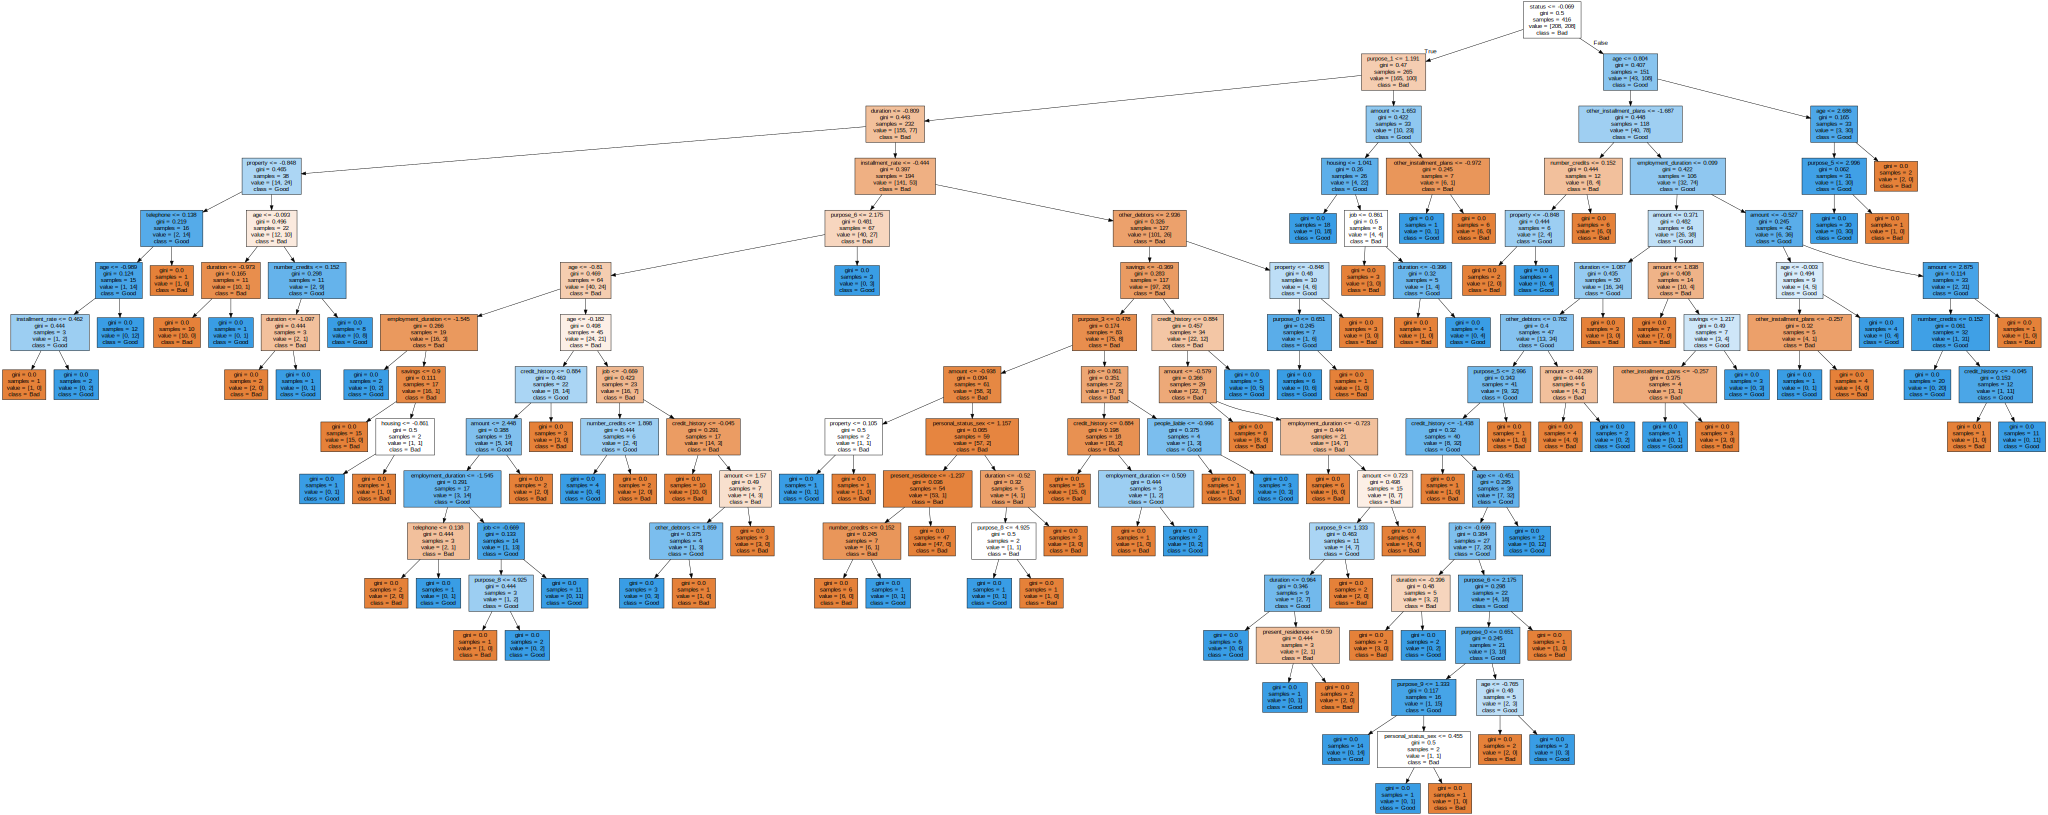

In [16]:
from graphviz import Source
from IPython.display import SVG

## se puede visualizar copiando y pegando el contenido del archivo .dot en http://www.webgraphviz.com/

graph = Source(tree.export_graphviz(clf, out_file=None
   , feature_names=X_train.columns, class_names=['Bad', 'Good'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

#8. Predecir el modelo

In [17]:
# Ahora podemos ocupar este modelo entrenado para predecir en nuestra muestra de entrenamiento y también de prueba.
# primero veamos como anduvo el modelo en muestra de prueba (no balanceada):
# crearemos el vector y_pred_train donde estára la predicción de clase para cada empresa en la data:

y_pred_train=clf.predict(X_train_std)
y_pred_train=pd.DataFrame(y_pred_train,columns=["Y_predicha"],index=y_train.index)
y_pred_train

Y_predicha
103           1
588           1
8             1
639           1
129           1
..          ...
805           0
769           0
871           0
700           0
860           0

[416 rows x 1 columns]

In [18]:
# Midamos como fue el ajuste del modelo en la muestra de entrenamiento. Típicamente miramos las métricas de Accuracy, Recall y Precision.
# para eso comparamos el vector con las clases reales vs las predichas por el modelo:

from sklearn.metrics import classification_report
print("Resultado en Muestra de Entrenamiento:")

print(classification_report(y_train, y_pred_train))


Resultado en Muestra de Entrenamiento:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           1       1.00      1.00      1.00       208

    accuracy                           1.00       416
   macro avg       1.00      1.00      1.00       416
weighted avg       1.00      1.00      1.00       416



In [19]:
# veamos ahora la matriz de confusión:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred_train)


array([[208,   0],
       [  0, 208]])

In [20]:
#repitamos ahora todos los pasos en muestra de Prueba:

# primero creamos el vector de las predicciones en la muestra de prueba

y_pred_test=clf.predict(X_test_std)
y_pred_test=pd.DataFrame(y_pred_test,index=y_test.index,columns=["Y_predicha"])

# luego creamos las probabilidades

y_probas_test=clf.predict_proba(X_test_std)
y_probas_test=pd.DataFrame(y_probas_test,index=y_test.index,columns=["Prob Bad","Prob Good"])

# creemos un DF con todas las columnas ordenadas para poder comparar lo predicho y su probabilidad, con la clase correcta:

preds_test=pd.concat([y_test,y_pred_test,y_probas_test],axis=1)
preds_test

credit_risk  Y_predicha  Prob Bad  Prob Good
521            0           0       1.0        0.0
737            1           1       0.0        1.0
740            1           0       1.0        0.0
660            1           1       0.0        1.0
411            1           1       0.0        1.0
..           ...         ...       ...        ...
468            1           0       1.0        0.0
935            0           0       1.0        0.0
428            1           0       1.0        0.0
7              1           1       0.0        1.0
155            1           1       0.0        1.0

[300 rows x 4 columns]

#9.Evaluación Classification report

In [21]:
#veamos las métricas de acierto:

from sklearn.metrics import classification_report
print("Resultado en Muestra de Prueba:")

print(classification_report(y_test, y_pred_test))

Resultado en Muestra de Prueba:
              precision    recall  f1-score   support

           0       0.47      0.79      0.59        92
           1       0.87      0.60      0.71       208

    accuracy                           0.66       300
   macro avg       0.67      0.70      0.65       300
weighted avg       0.75      0.66      0.67       300



In [22]:
# veamos ahora la matriz de confusión:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_test)

array([[ 73,  19],
       [ 83, 125]])

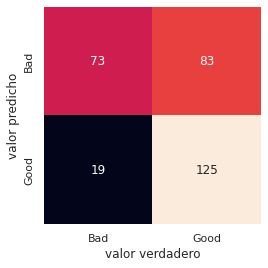

In [23]:
mat_t= confusion_matrix(y_test, y_pred_test)
mat_t

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

sns.heatmap(mat_t.T,square=True,annot=True,fmt='d',cbar=False,
           xticklabels=["Bad","Good"],
           yticklabels=["Bad","Good"])
plt.xlabel('valor verdadero')
plt.ylabel('valor predicho')
plt.show()